## Decision Tree

### 1. 환경준비

In [1]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

### 2. 데이터 준비

In [2]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [5]:
# EmployeeNumber 제거
data.drop(['EmployeeNumber'], axis=1, inplace=True)

In [6]:
# x, y 나누기
target = 'Attrition'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [ ]:
# NA 조치

In [7]:
# 가변수화
cat_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

In [8]:
# train, valid 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

In [ ]:
# Scaling

### 3. 모델링

In [9]:
# import
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import *

In [10]:
# 선언
model = DecisionTreeClassifier() # default로 만들면 가장 복잡한 트리가 생성

In [11]:
# 학습
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
# 예측
pred = model.predict(x_val)

In [13]:
# 평가
confusion_matrix(y_val, pred)

array([[257,  43],
       [ 39,  20]], dtype=int64)

In [14]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       300
           1       0.32      0.34      0.33        59

    accuracy                           0.77       359
   macro avg       0.59      0.60      0.60       359
weighted avg       0.78      0.77      0.77       359



### 4. Hyper Parameter

- max_depth : 트리의 깊이 (크기를 결정)
- min_samples_leaf : leaf 노드의 최소 데이터 건수
    - leaf 노드는 y를 예측하는데 사용. 데이터가 적으면 예측 결과에 대해 신뢰도가 떨어질 수 있음.

#### (1) max_depth

In [15]:
# max_depth = 2
model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       300
           1       0.32      0.34      0.33        59

    accuracy                           0.77       359
   macro avg       0.59      0.60      0.60       359
weighted avg       0.78      0.77      0.77       359



In [16]:
# max_depth = 5
model2 = DecisionTreeClassifier(max_depth = 5)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       300
           1       0.44      0.25      0.32        59

    accuracy                           0.82       359
   macro avg       0.65      0.60      0.61       359
weighted avg       0.80      0.82      0.80       359



#### (2) min_samples_leaf

In [17]:
# min_samples_leaf = 30
model3 = DecisionTreeClassifier(min_samples_leaf = 30)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       300
           1       0.52      0.22      0.31        59

    accuracy                           0.84       359
   macro avg       0.69      0.59      0.61       359
weighted avg       0.81      0.84      0.81       359



In [18]:
# min_samples_leaf = 60
model4 = DecisionTreeClassifier(min_samples_leaf = 60)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_val)
print(classification_report(y_val, pred4))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.47      0.31      0.37        59

    accuracy                           0.83       359
   macro avg       0.67      0.62      0.64       359
weighted avg       0.81      0.83      0.81       359



### 5. Decision Tree 내부 들여다 보기

#### 모델 시각화

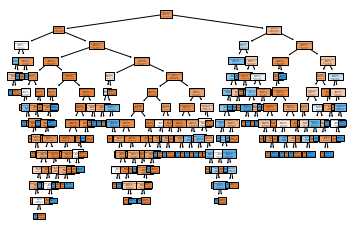

In [20]:
from sklearn.tree import plot_tree

plot_tree(model,
          feature_names = list(x_train),
          class_names = ['Stay', 'Leave'],
          filled = True)

plt.show()

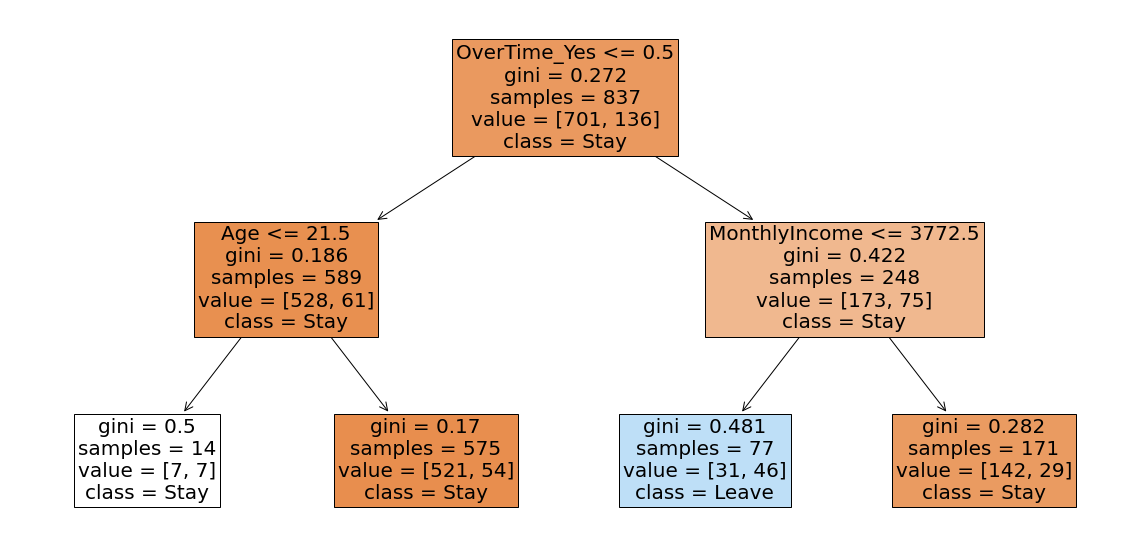

In [21]:
# max_depth = 2
plt.figure(figsize = (20,10))
plot_tree(model1, 
          feature_names = list(x_train), 
          class_names= ['Stay', 'Leave'], 
          filled = True, 
          fontsize = 20)

plt.show()

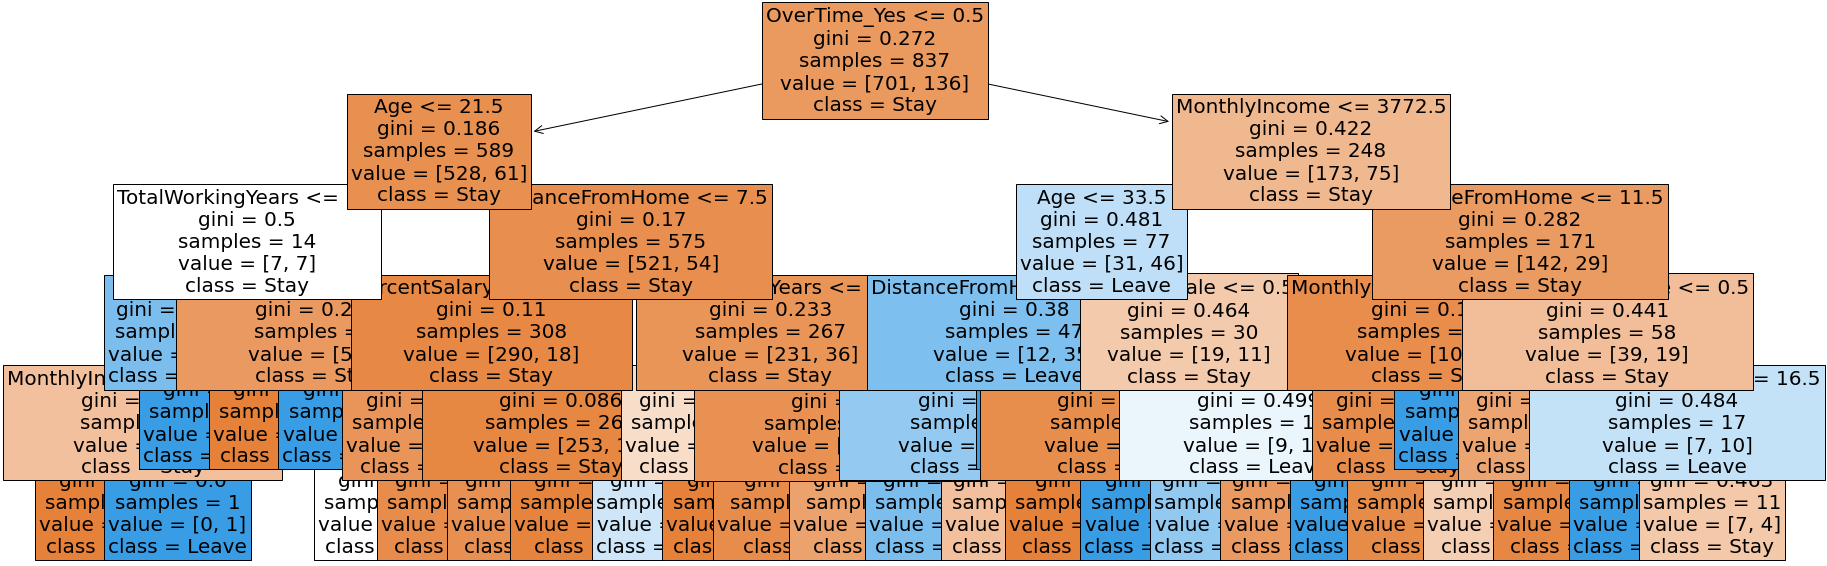

In [22]:
# max_depth = 5
plt.figure(figsize = (30,10))
plot_tree(model2, 
          feature_names = list(x_train), 
          class_names= ['Stay', 'Leave'], 
          filled = True, 
          fontsize = 20)

plt.show()

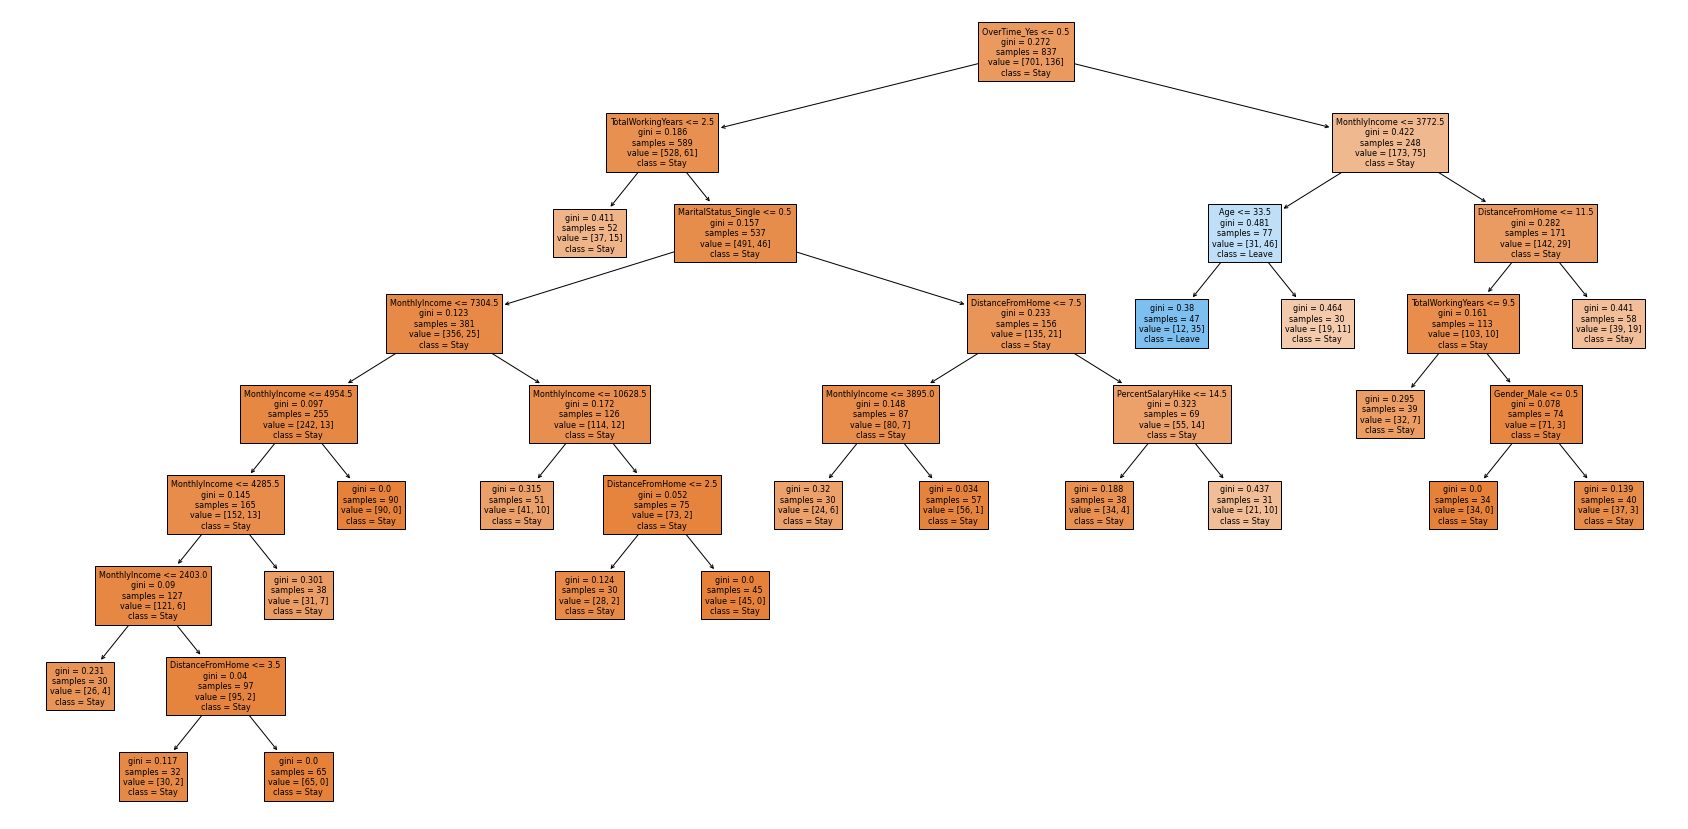

In [23]:
# min_samples_leaf = 30
plt.figure(figsize = (30,15))
plot_tree(model3, 
          feature_names = list(x_train), 
          class_names= ['Stay', 'Leave'], 
          filled = True, 
          fontsize = 8)
plt.show()

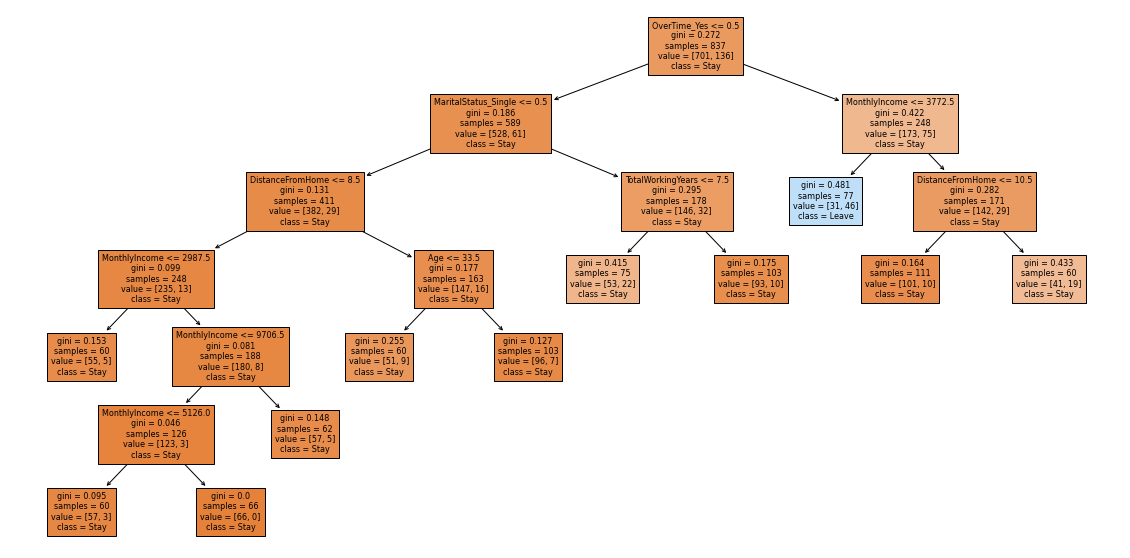

In [24]:
# min_samples_leaf = 60
plt.figure(figsize = (20,10))
plot_tree(model4, 
          feature_names = list(x_train), 
          class_names= ['Stay', 'Leave'], 
          filled = True, 
          fontsize = 8)
plt.show()

#### 변수 중요도

In [25]:
print(list(x_train))
print(model.feature_importances_)

['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'Gender_Male', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']
[0.1748937  0.12250381 0.26677253 0.07954781 0.14691249 0.04356822
 0.01352125 0.01365696 0.03633215 0.01555918 0.02614502 0.06058689]


In [26]:
def plot_feature_importance(importance, names):
    # numpy 변환
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # df 변환
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # 정렬
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    # 시각화
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

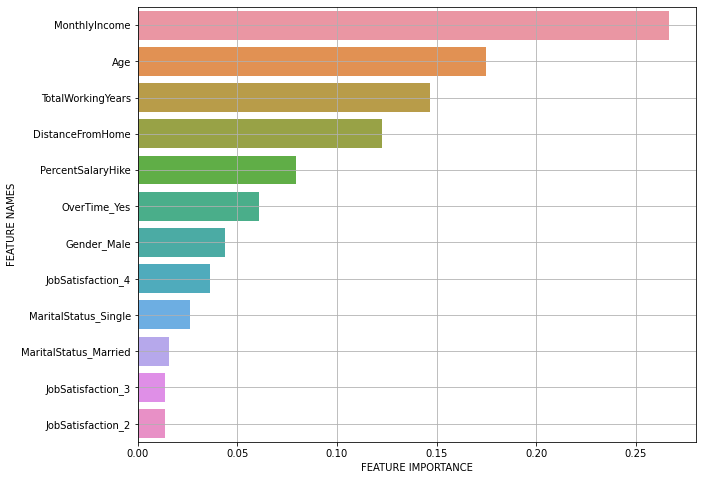

In [27]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

In [28]:
result

,feature_names,feature_importance
0,MonthlyIncome,0.266773
1,Age,0.174894
2,TotalWorkingYears,0.146912
3,DistanceFromHome,0.122504
4,PercentSalaryHike,0.079548
5,OverTime_Yes,0.060587
6,Gender_Male,0.043568
7,JobSatisfaction_4,0.036332
8,MaritalStatus_Single,0.026145
9,MaritalStatus_Married,0.015559


- 부모의 불순도를 가장 많이 떨어뜨리는 변수는 OverTime
- 모델의 전체 관점에서 보면,
    - 모든 노드의 불순도를 가장 많이 떨어뜨리는 MonthlyIncome이 중요.

### 6. 실습 : 이동통신 가입 고객 이탈 예측

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)

#### (1) 데이터 전처리

In [29]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [30]:
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [31]:
# id 제거
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

In [32]:
# x, y 나누기
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [33]:
# 가변수화
cat_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

In [34]:
# train, val 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

#### (2) 모델링

- max_depth를 1 ~ 10 사이에서 조정
- min_samples_leaf를 20 ~ 300 사이에서 조정

In [35]:
model1 = DecisionTreeClassifier(max_depth=5)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

       LEAVE       0.66      0.78      0.71      2949
        STAY       0.74      0.61      0.67      3051

    accuracy                           0.69      6000
   macro avg       0.70      0.70      0.69      6000
weighted avg       0.70      0.69      0.69      6000



In [36]:
model2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

       LEAVE       0.66      0.77      0.71      2949
        STAY       0.74      0.62      0.67      3051

    accuracy                           0.69      6000
   macro avg       0.70      0.70      0.69      6000
weighted avg       0.70      0.69      0.69      6000



In [37]:
model3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=300)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

       LEAVE       0.67      0.78      0.72      2949
        STAY       0.74      0.62      0.68      3051

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000



#### (3) 시각화 및 변수 중요도

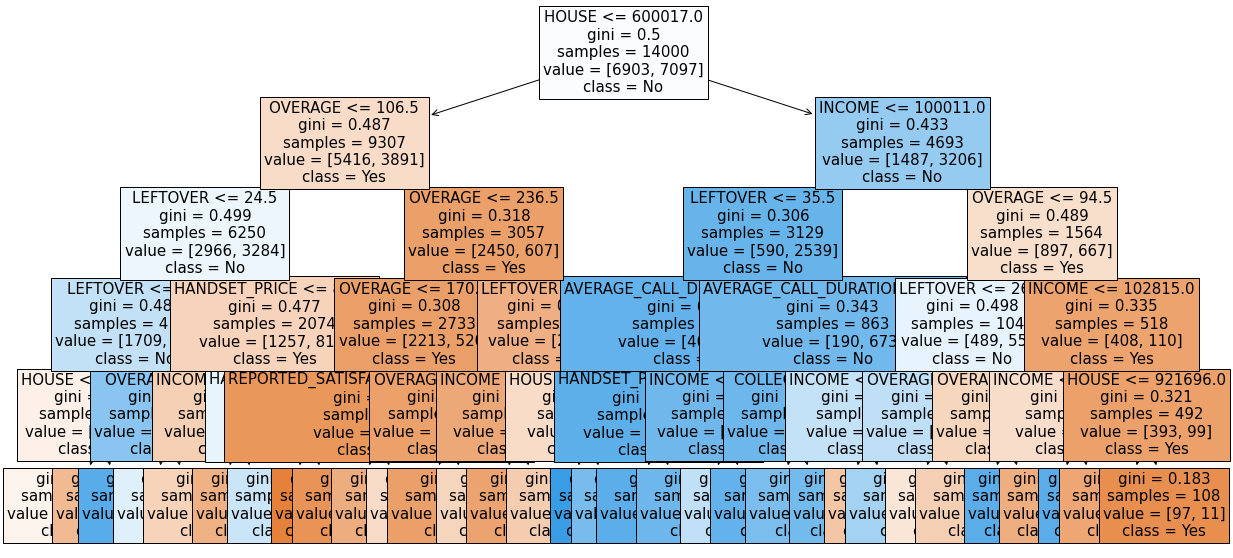

In [38]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model1, 
          feature_names = list(x_train), 
          class_names= ['Yes', 'No'], 
          filled = True, 
          fontsize = 15)
plt.show()

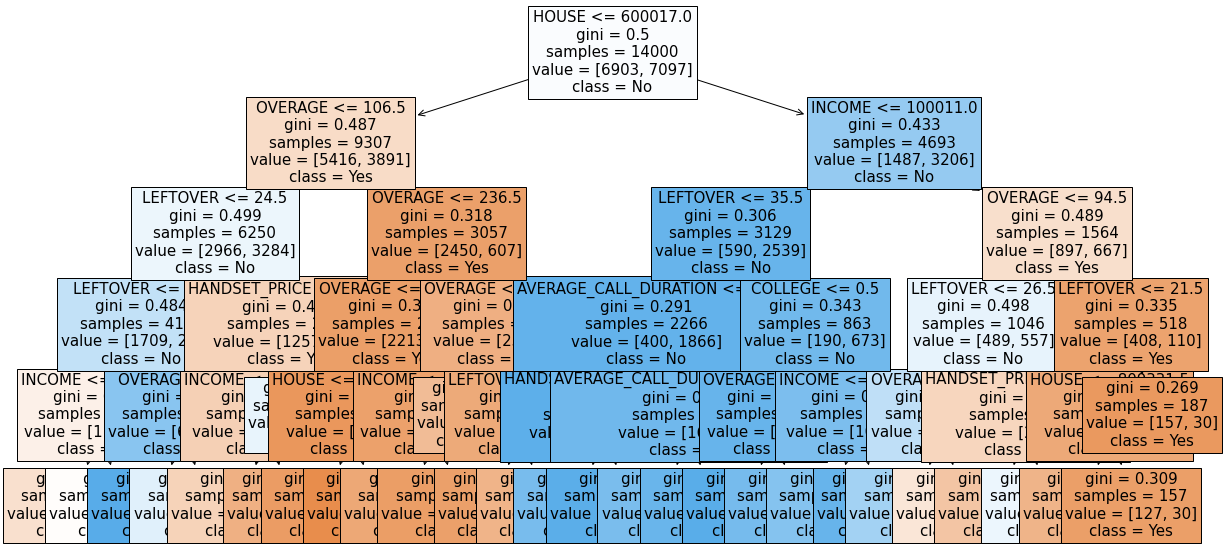

In [39]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model2, 
          feature_names = list(x_train), 
          class_names= ['Yes', 'No'], 
          filled = True, 
          fontsize = 15)
plt.show()

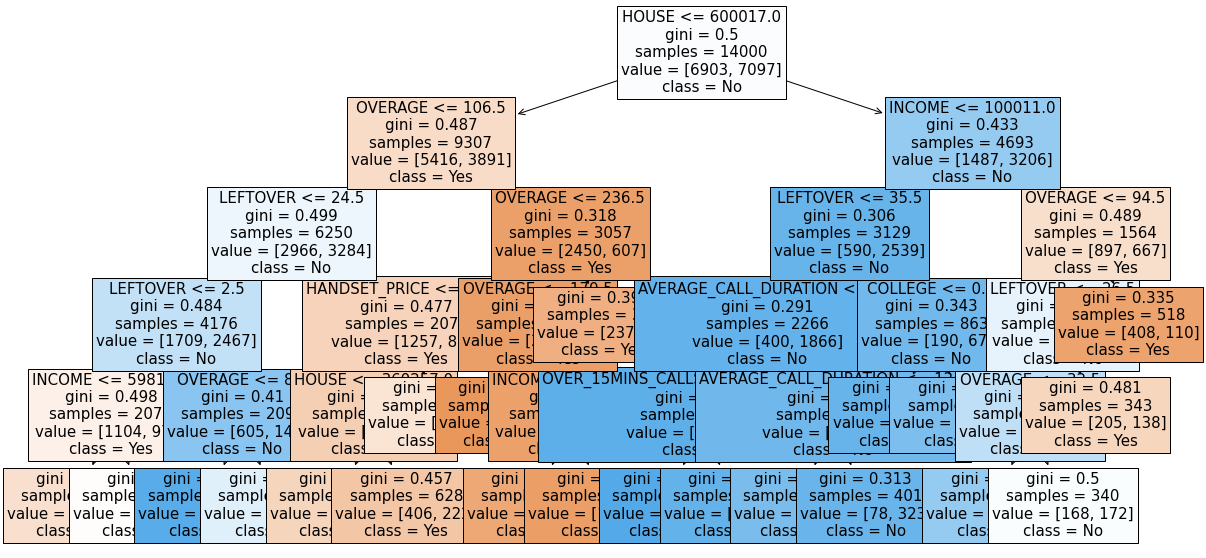

In [40]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model3, 
          feature_names = list(x_train), 
          class_names= ['Yes', 'No'], 
          filled = True, 
          fontsize = 15)
plt.show()

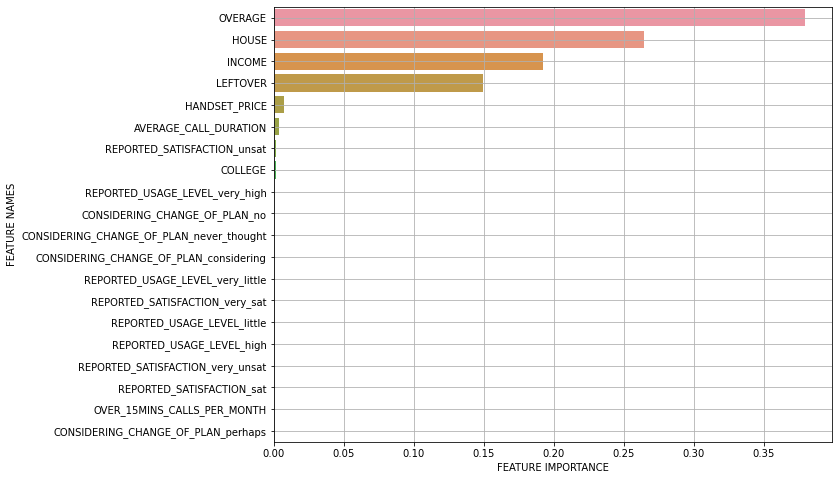

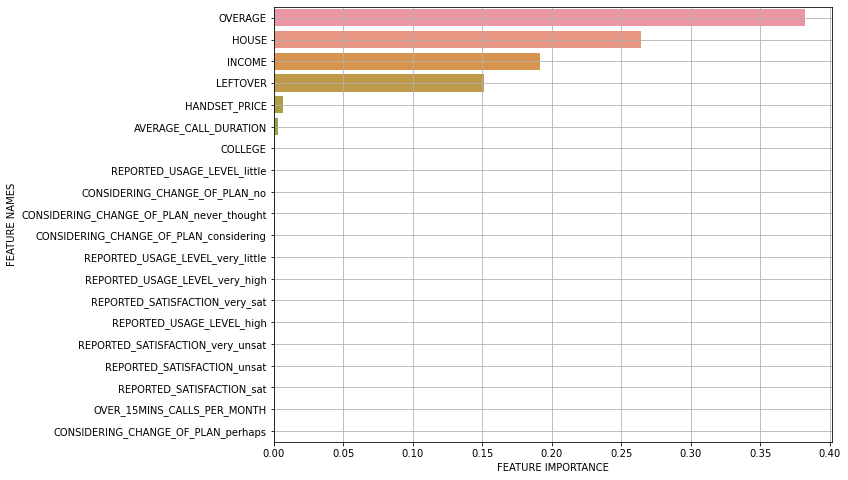

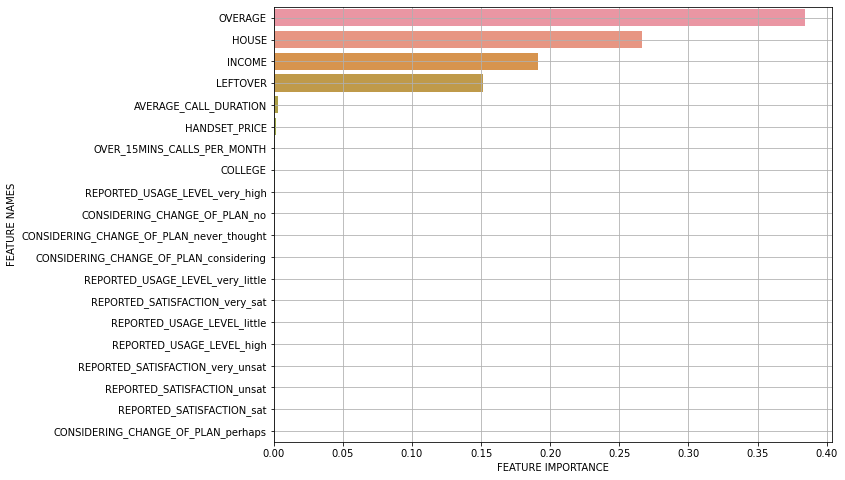

In [41]:
result1 = plot_feature_importance(model1.feature_importances_, list(x_train))
result2 = plot_feature_importance(model2.feature_importances_, list(x_train))
result3 = plot_feature_importance(model3.feature_importances_, list(x_train))